<a href="https://colab.research.google.com/github/Mahi200728/DataScience-A2/blob/main/Jave_MahiU9Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 9 Project: Your first neural network

**Task**:

Two parts:

1. Get a data set approved by your instructor (me). It must have either: three or more variables OR a sufficiently complicated relationship between two of the variables.

2. Create, analyze, and present a multi-layer non-linear neural network using the python programming language. Remember that visualizing your model is part of analyzing it.


I decided to do bikes as my data set as it had multiple predictors and seemed pretty simple which is what I wanted because I wanted to better understand the affects of each line of code on the final graph. I think that temperature will have the biggest affect because most people bike only when the weather is good.

In [ ]:
!pip install pymc-bart
!pip install preliz

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
bikes = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/bikes.csv").dropna()

In [ ]:
real_bikes = bikes[["rented","hour","temperature","humidity","windspeed"]]

In [ ]:
real_bikes

I decided to only do hour, temp, humidity, and windspeed because I felt like those were the most likely variables to affect the rent rate.

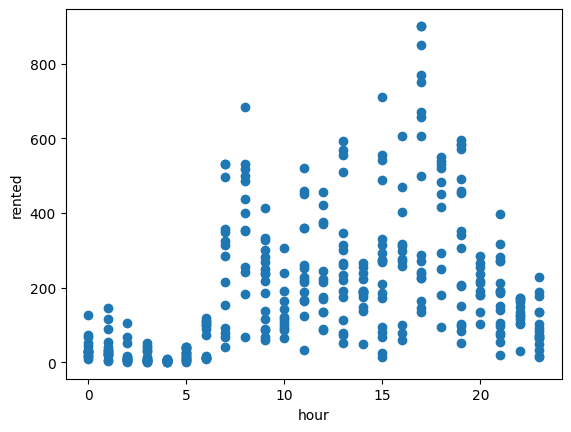

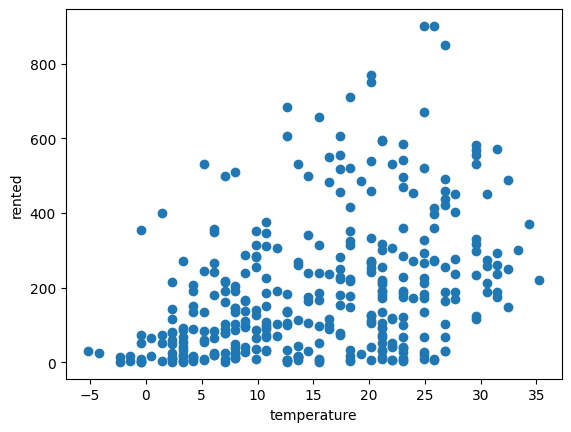

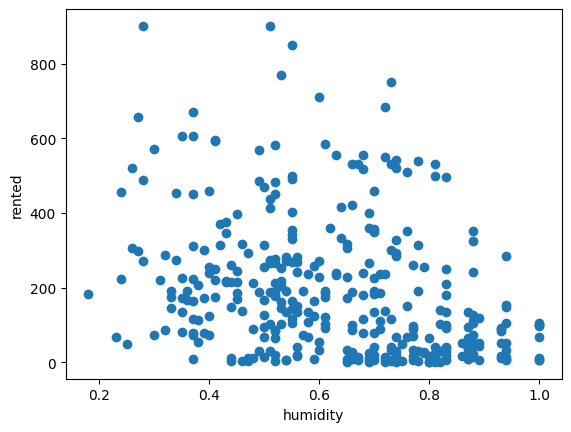

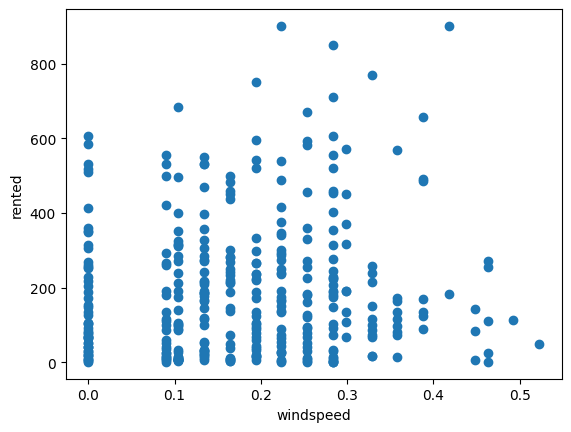

In [ ]:
x = ["hour","temperature","humidity","windspeed"]
y = "rented"
for a in x:
  plt.scatter(bikes[a], bikes[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

Based on these scatterplots I thought that temperature would have the most clear affect. But that being said none of these predictors paticularly seemed to be that great. Windspeed was very columny and it just didn't seem that great. Humidity also showed somewhat of a correlation but it was negative and it wasn't as strong as temperature. Hour also kinds showed a correlation but it kinda seemed bimodal which I didn't want to deal with. I think it also logically makes the most sense because if the temperature is low most people aren't likely to go on a bike ride and also temperture is affected by variables like windspeed (high windspeeds = colder temps) and early mornings are colder than midafternoon.

In [ ]:
#convert to a PyTorch tensor
t = bikes.temperature.to_numpy()
temp = torch.from_numpy(t)
r = bikes.rented.to_numpy()
rent = torch.from_numpy(r)

In [ ]:
X = temp.unsqueeze(dim=1) #use height as a predictor
y = rent.unsqueeze(dim=1)

In [ ]:
# Scale the height(rent) using standardization
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(
    temp.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    temp_scaled, rent, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-56-0367ab7012a4>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-56-0367ab7012a4>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=1, out_features=7),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

When trying to make the graph better I tried to add another layer and some more neurons to make the function more complex but it didn't really work out so I didn't use it.

In [ ]:
""" didnt use
model_1 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=1, out_features=14),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines
    nn.Linear(in_features=14, out_features=7), # Added another layer

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

I again tried to lower the learning rate to help the model fit better but it didn't really work and it was cauing the training to be really bad so I went back to the original number and only lowered it a bit so it didn't overshoot.

In [ ]:
''' didnt use
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0000001)

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 5000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

In [ ]:
# Turn on evaluation mode
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

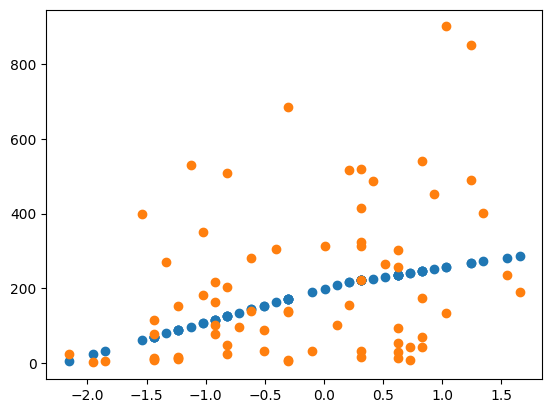

In [ ]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())

#plots test data
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

This graph is honestly the best I could get it. The model follows the general trend but I think the observed data was just too obscure to be fully captured by the model. WHich is why I decided to combine what I thought were teh two biggest factors, temp and hour. By doing this I wanted to see if I could get a clearer correlation and it made me less worried about having to deal with bimodal stuff.

In [ ]:
th = bikes[["temperature","hour"]]

In [ ]:
#convert to a PyTorch tensor
#convert to a PyTorch tensor
th = bikes[["temperature","hour"]].to_numpy()
th = torch.from_numpy(th)
rent = bikes["rented"].to_numpy()
rent = torch.from_numpy(rent)

In [ ]:
X = th.unsqueeze(dim=1) #use height as a predictor
y = rent.unsqueeze(dim=1) #weight is the estimand, the thing we're predicting.

In [ ]:
# Scale the tensor using standardization
scaler = StandardScaler()
th_scaled = scaler.fit_transform(th) # th already has the correct shape for StandardScaler

# Scale the Total Interactions using standardization
scaler_y = StandardScaler() # Use a different scaler for the target variable
rent_scaled = scaler_y.fit_transform(rent.reshape(-1, 1))

# Split data into training and testing sets
# Use th_scaled as the input features (X) and rent_scaled as the target (y)
X_train, X_test, y_train, y_test = train_test_split(
    th_scaled, rent_scaled, test_size=0.2, random_state=42 # Added random_state for reproducibility
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=2, out_features=7),

    nn.RReLU(),

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001)

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train) # Removed .squeeze() from y_pred

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Plot the actual test data
plt.scatter(X_test[:, 0].detach().numpy(), y_test.detach().numpy(), label='Actual Test Data') # Plot against the first feature of X_test

plt.scatter(X_test[:, 0].detach().numpy(), y_preds.detach().numpy(), label='Model Predictions') # y_preds will now have the correct shape

This model was really bad. The prediction barely captured the data and the trend so I decided to try and fix the code in the same way I did earlier. By this I mean setting the epochs higher to give it more time to adjust the model. Lower the learning rate as well as add a weight decay as it is meant to help add constraints to the model which will help it generalize more accuratly.

Epoch: 0 | Train loss: 1.25045, Test loss: 1.08393
Epoch: 200 | Train loss: 1.03398, Test loss: 0.88950
Epoch: 400 | Train loss: 0.91141, Test loss: 0.78225
Epoch: 600 | Train loss: 0.83357, Test loss: 0.71651
Epoch: 800 | Train loss: 0.78216, Test loss: 0.67555
Epoch: 1000 | Train loss: 0.74739, Test loss: 0.65019
Epoch: 1200 | Train loss: 0.72400, Test loss: 0.63479
Epoch: 1400 | Train loss: 0.70810, Test loss: 0.62592
Epoch: 1600 | Train loss: 0.69706, Test loss: 0.62065
Epoch: 1800 | Train loss: 0.68889, Test loss: 0.61731
Epoch: 2000 | Train loss: 0.68250, Test loss: 0.61488
Epoch: 2200 | Train loss: 0.67728, Test loss: 0.61272
Epoch: 2400 | Train loss: 0.67272, Test loss: 0.61063
Epoch: 2600 | Train loss: 0.66867, Test loss: 0.60855
Epoch: 2800 | Train loss: 0.66470, Test loss: 0.60620
Epoch: 3000 | Train loss: 0.66078, Test loss: 0.60363
Epoch: 3200 | Train loss: 0.65705, Test loss: 0.60103
Epoch: 3400 | Train loss: 0.65333, Test loss: 0.59840
Epoch: 3600 | Train loss: 0.64967, 

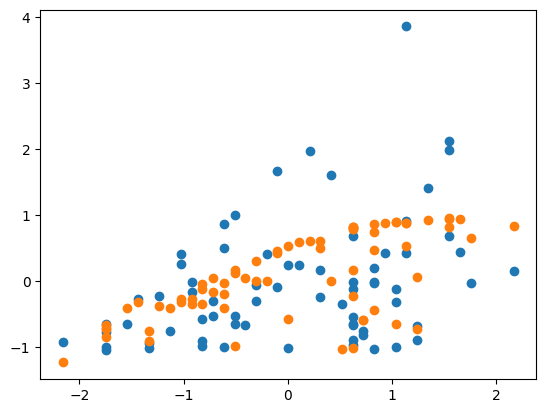

In [ ]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=2, out_features=7),

    nn.ReLU(),

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001,
                            weight_decay=0.001)

# Set the number of epochs; this is how many times we update our model
epochs = 7000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Plot the actual test data
plt.scatter(X_test[:, 0].detach().numpy(), y_test.detach().numpy(), label='Actual Test Data') # Plot against the first feature of X_test

plt.scatter(X_test[:, 0].detach().numpy(), y_preds.detach().numpy(), label='Model Predictions') # y_preds will now have the correct shape

By changing that I think the prediction was able to capture more of the data and just overall model it much better. It was able to take on a similar curve and it was able to predict some of the lower values which was surprising.

I think overall the second model was better than the first the because the variables were more accurate and also I think in a realworld sense it took the two big factors and combined them which made the model more accurate. I think that if we had more factors, like chance of rain fall that given day, we could have made a stronger correlation and found something that could help predict it better but from the variables given I think this model did a great job.